# Lecture 09 - Integration and Differentiation

#### Integration

Let the integral of a function $f(x)$ between two points $a$ and $b$ be defined as
$$ I(a,b)=\int_a^b f(x)\ \mathrm{d}x$$
The [trapizoidal rule][1] uses $N$ slices of width $h=(b-a)/N$ and a linear approximation of the function between the slices, using the two-points at the ends of each interval.
<img width=250 src="https://upload.wikimedia.org/wikipedia/commons/d/d1/Integration_num_trapezes_notation.svg" />

Consider slice $i$, which runs in the $x$ axis from point $x_{i-1}=a+(i-1)h$ to $x_i=a+ih$. The area of that slice is 
$$A_i=\frac{1}{2}h\left[f(a+(i-1)h)-f(a+ih)\right]$$ 
Then the integral can be approximated as 
$$I(a,b)\approx\sum_{i=1}^{N}A_i = h\left[\frac{1}{2}f(a)+\frac{1}{2}f(b)+\sum_{i=1}^{N-1}f(a+ih)\right]$$
This formula is known as the trapizoidal rule.

[1]: https://en.wikipedia.org/wiki/Trapezoidal_rule

#### Example 1

Write a program that evaluates the folowing integral by the trapazoidal rule
$$I = \int^{2}_{0} (x^2-2x+1) \mathrm{d}x$$
* Provide a function that returns the value of the integrand $f(x)$ for a given value of $x$
* Write a function that performs the trapizoidal rule, by calling another function.
* Provide a function that returns the true value of the integral $I(x)$ at some point $x$
* How does the numerical result compare to the correct result as a function of the number of intervals?

<div class="alert alert-block alert-info">
<b>Note:</b> It is time to think about the <a href="https://en.wikipedia.org/wiki/Scope_(computer_science)">scope of variables</a>.
</div>

In this program, you are defining a Python function for $f(x)$
```python
def f(x) :
```    
that another function for the trapzoid rule 
```python
def trapz(a,b) :
```
needs to use. How will the `trapz` know about the existence of `f` because it is *your* function, and not part of Python or any package?

In [1]:
# -- This is the function I want to integrate
# -- NOTE THE SCOPE AND CONFLICT BETWEEN THE FUNCTION NAME AND VARIABLE NAME INSIDE
def f(x):
    f=x**2-2*x+1
    return f

# -- Use the trapazoidal rule to integrate f(x) from a to b
# -- IMPORTANT: How does the function trapz know about the function f? 
def trapz(a,b):
    N=10
    h=(b-a)/N
    s=0.5*f(a)+0.5*f(b)
    for i in range(1,N):
        s += f(a+i*h)
    I = s*h
    return I

# -- Use my trapazoidal rule function with the limits of integration 0->2
I = trapz(0.0,2.0)

# -- This is the true indefinite integral
def intf(x) :
    intf=x**3/3-x**2+x
    return intf

# -- Evaluate the indefinite integral at the limits of integration
Itrue = intf(2.0)-intf(0.0)
deltaI = 100*abs(I-Itrue)/Itrue

print(f"Trapizoidal rule          : {I:2.6}")
print(f"The true value            : {Itrue:2.6}")
print(f"The percent difference is : {deltaI:1.2}%")

Trapizoidal rule          : 0.68
The true value            : 0.666667
The percent difference is : 2.0%


In [2]:
# -- This is the function I want to integrate
# -- NOTE THE SCOPE AND CONFLICT BETWEEN THE FUNCTION NAME AND VARIABLE NAME INSIDE
def g(x):
    g=x**3-2*x+1
    return g

# -- Use the trapazoidal rule to integrate f(x) from a to b
# -- IMPORTANT: How does the function trapz know about the function f? 
def trapz(f,a,b):
    N=10
    h=(b-a)/N
    s=0.5*f(a)+0.5*f(b)
    for i in range(1,N):
        s += f(a+i*h)
    I = s*h
    return I

# -- Use my trapazoidal rule function with the limits of integration 0->2
I = trapz(f,0.0,2.0)

# -- This is the true indefinite integral
def intg(x) :
    intf=x**4/4-x**2+x
    return intf

# -- Evaluate the indefinite integral at the limits of integration
Itrue = intf(2.0)-intf(0.0)
deltaI = 100*abs(I-Itrue)/Itrue

print(f"Trapizoidal rule          : {I:2.6}")
print(f"The true value            : {Itrue:2.6}")
print(f"The percent difference is : {deltaI:1.2}%")

Trapizoidal rule          : 0.68
The true value            : 0.666667
The percent difference is : 2.0%


Scipy has a trapizoidal rule function to use. However, it does not call another function that calculate the integrand. Instead it expects to integrate an array that already contains the curve to be integrated. So we will have to use our function for the integrand and calculate the curve first.

[`scipy.integrate.trapz`][1] Integrate along the given axis using the composite trapezoidal rule.

[`numpy.linespace`][2] Return evenly spaced numbers over a specified interval.

[1]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.trapz.html
[2]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html

In [3]:
#
# -- Use the scipy.integrate.trapz function to integrate f(x) from 0.0 to 2.0
# -- Since function f(x) was defined in the cell above, I will not show it again here.
#
import scipy.integrate
import numpy
#
# -- First we need to set up the intervals by defineing an array of points along the x axis.
# -- 20 intervals is 21 data points!
#
x = numpy.linspace(0.0,2.0,num=41,endpoint=True)
#
# -- The next line will take an array of x values and call the function f 
# -- element by element, and thus build a new array y.
#
y = f(x)
I =scipy.integrate.trapz(y,x)

deltaI = 100*abs(I-Itrue)/Itrue

print(f"Trapizoidal rule          : {I:2.6}")
print(f"The true value            : {Itrue:2.6}".format(Itrue))
print(f"The percent difference is : {deltaI:1.2}%")

Trapizoidal rule          : 0.6675
The true value            : 0.666667
The percent difference is : 0.13%


#### Simpson's rule

[Simpson's rule][1] uses quadratic equation through three points on $f(x)$ to get the area under two adjacent slices as
$$A=\frac{1}{3}h\left[f(-h)+4f(0)+f(+h)\right]$$

After summing over all slices, and taking the end points into account, we have
$$I(a,b)=\frac{1}{3}h\left[f(a)+f(b)+4\sum_{k=1}^{N/2}f(a+(2k-1)h)+2\sum_{k=1}^{N/2-1}f(a+2kh)\right]$$

[1]: https://en.wikipedia.org/wiki/Simpson%27s_rule

#### Error esitmation

The error esitmation of the trapizoidal rule can be approxmated by
$$\epsilon = \frac{1}{3}\left|I_2-I_1\right|$$
where $I_2$ is double the number of slices than when $I_1$ is calculated.

#### Example 2

Extend the trapizodal function above to estimate the error by performing the integration twice, once with 20 slices, again with 40. Return both the integral and the error estimate from your function, like this:
```python    
return I, err
```

In [4]:
# -- This is the function I want to integrate
def f(x):
    f=x**4-2*x+1
    return f

# -- Use the trapazoidal rule to integrate f(x) from a to b
def trapz(a,b):
    N=20
    h=(b-a)/N
    s20=0.5*f(a)+0.5*f(b)
    for i in range(1,N):
        s20 += f(a+i*h)
    I20 = s20*h
    N=40
    h=(b-a)/N
    s40=0.5*f(a)+0.5*f(b)
    for i in range(1,N):
        s40 += f(a+i*h)
    I40 = s40*h
    err = (1/3)*numpy.abs(I40-I20)
    return I40,err

# -- Use my trapazoidal rule function with the limits of integration 0->2
I,err = trapz(0.0,2.0)

# -- This is the true indefinite integral
def intf(x) :
    intf=x**5/5-x**2+x
    return intf

# -- Evaluate the indefinite integral at the limits of integration
Itrue = intf(2.0)-intf(0.0)
deltaI = 100*abs(I-Itrue)/Itrue

print(f"Trapizoidal rule          : {I:2.4f} +/- {err:2.4f}")
print(f"The true value            : {Itrue:2.4f}")
print(f"The percent difference is : {deltaI:1.2f}%")

Trapizoidal rule          : 4.4067 +/- 0.0067
The true value            : 4.4000
The percent difference is : 0.15%


#### Gaussian quadrature

An $n$-point [Gaussian quadrature rule][1] is a quadrature rule constructed to yield an exact result for polynomials of degree $2n − 1$ or less by a suitable choice of the nodes $x_i$ and weights $w_i$ for $i = 1, ..., n$. The most common domain of integration for such a rule is taken as $[-1,1]$, so the rule is stated as
$$\int_{-1}^{1}f(x)\ \mathrm{d}x\approx\sum_{i=1}^{n}w_if(x_i)$$

There are many forms of the weights $w_i$, and choosing the appropriate one is an advanced mathematical topic.

The [NIST Digital Library of Mathematical Functions][2] has the formulas for more advanced methods.

[1]: https://en.wikipedia.org/wiki/Gaussian_quadrature
[2]: https://dlmf.nist.gov/3.5

#### Example 3

Use [`scipy.integrate.quad`][3] to evaluate the integral above. 

[3]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html

<div class="alert alert-block alert-info">
<b>Tip:</b> Note that <tt>scipy.integrate.quad</tt> does not need to have the $x$ and $y$ points calulcated ahead of time. Instead, it takes the function $f(x)$ as a variable directly.
</div>

In [5]:
# -- This is the function I want to integrate
def f(x):
    f=x**4-2*x+1
    return f

# -- This is the true indefinite integral
def intf(x) :
    intf=x**5/5-x**2+x
    return intf

# -- Evaluate the indefinite integral at the limits of integration
# -- Use my trapazoidal rule function with the limits of integration 0->2
results = scipy.integrate.quad(f,0.0,2.0,full_output=False)
I = results[0]
epsilon = results[1]
Itrue = intf(2.0)-intf(0.0)
deltaI = 100*abs(I-Itrue)/Itrue

print(results)
print(f"Gaussian Quad rule          : {I:2.4f} +/- {epsilon:1.4f}")
print(f"The true value            : {Itrue:2.4f}")
print(f"The percent difference is : {deltaI:1.2g}%")

(4.3999999999999995, 5.003996496050337e-14)
Gaussian Quad rule          : 4.4000 +/- 0.0000
The true value            : 4.4000
The percent difference is : 2e-14%


#### Differentiation

Derivatives are defined as the rate of change of one variable with respect to another.
$$f'(x)=\frac{\mathrm{d}y}{\mathrm{d}x}\approx\frac{\Delta y}{\Delta x}$$

Normally, the derivative of a function represents an *infinitesimal* change in the function with respect to one of its variables. For real data, much like for integration, we don't have data at *infinitesimally* spaced points $x_i$. Nevertheless, the above equation is all we do have.

Calculated symmetrically, we have the *central difference* definition of the gradient derivative:
$$f'(x)=\lim_{h\rightarrow0}\frac{f(x+h)-f(x-h)}{h}$$

There are several nearly equivalent ways of doing this in  python, depending on whether you have data  already in arrays or just a function.


The first method is the most crude. If you assume your data array spacing in $x$ is small enough, we simply calculate the slope of each interval from
$$\frac{\Delta y}{\Delta x}=\frac{y_{i+1}-y_i}{y_{i+1}-x_i}.$$
[`numpy.diff`][1] returns an array where each element is subracted from the one following it.

The second method uses [`numpy.gradient`][2] which is computed on data arrays using second order accurate central differences in the interior points and either first or second order accurate one-sides (forward or backwards) differences at the boundaries.

[1]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.diff.html
[2]: https://docs.scipy.org/doc/numpy/reference/generated/numpy.gradient.html

#### Example 4

Take the derivative of $sin(x)$ using the `numpy.diff` method

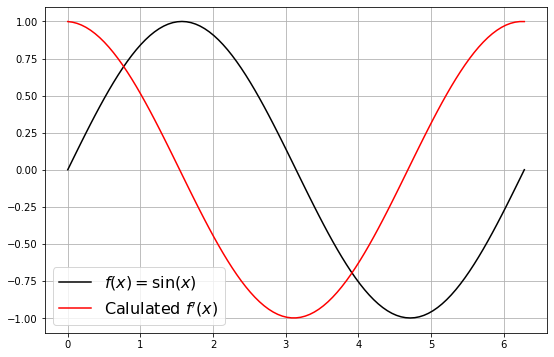

In [6]:
# -- Set up a data to find the derivative of.
# -- Let's use f(x)=sin(x) because we know f'(x)=cos(x) 
x = numpy.linspace(0,2*numpy.pi,101)
y = numpy.sin(x)
# -- Let's also set up our own function to call, but we will only use
# -- a simple sin(x) function as an example.
def f(x) :
    return numpy.sin(x)

%matplotlib inline
import matplotlib.pyplot as plot

# -- f' or "f-prime" (fp) will be the derivative
# -- I want the length of the array to be the same as x
# -- If I use numpy.diff to create fp, it will be too short by one element.
yp = numpy.zeros(x.shape,numpy.float64)

# -- numpy.diff returns an array one less in length because the 
# -- last element cannot be subtracted from anything. 
# -- So we calculate fp over the the range [0:-1] which is from the first element 
# -- to next-to-last. 
# -- fp1[0:x.size] would work too.
yp[0:-1] = numpy.diff(y)/numpy.diff(x)
# -- Now we calculate f' for the last element by using the next-to-last element
yp[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

plot.figure(figsize=(9,6))
plot.plot(x,y,"k-",label=r'$f(x)=\sin(x)$')
plot.plot(x,yp,"r-",label=r'Calulated $f^{\prime}(x)$')
plot.legend(fontsize=16)
plot.grid(True)
plot.show()
plot.close()

The above example is when you already have data arrays available to you such as in a file, or part of a calculation.

When you have a function to differentiate, you are not limited by the end points, or the spacing in $x$ of your data. You can make your $\Delta x$ as small as you want.

#### Example 5
Use the central difference formula to take the derivative of $e^{-1.2x}$

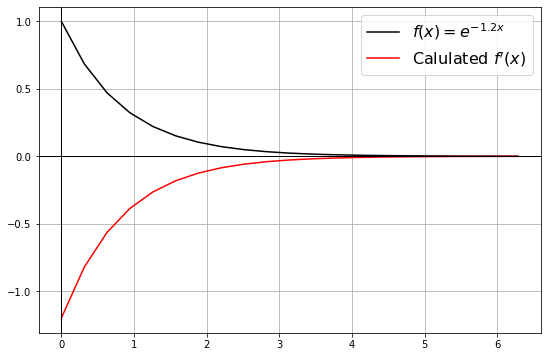

In [7]:
# -- Let's set up our own function to cal
def f(x) :
    return numpy.exp(-1.2*x)

# -- The variable *func* used here IS NOT the function we defined above.
# -- This variable only has scope and meaning WITHIN THIS FUNCTION.
def derivative(func,a,h=0.01) :
    return (func(a + h) - func(a - h))/(2*h)

# -- This is a more logical way to set up a derviative of a function
# -- when you only have the function not the data.
x = numpy.linspace(0.0,2.0*numpy.pi,21)
y = f(x)
yp = derivative(f,x)

plot.figure(figsize=(9,6))
plot.plot(x,y,"k-",label=r'$f(x)=e^{-1.2x}$')
plot.plot(x,yp,"r-",label=r'Calulated $f^{\prime}(x)$')
plot.legend(fontsize=16)
plot.axhline(y=0,color="k",linewidth=1)
plot.axvline(x=0,color="k",linewidth=1)
plot.grid(True)
plot.show()
plot.close()

#### Higher order dervatives

The function [`scipy.misc.derivative`][1] also has a function for derivatives that calls a function, instead of taking an array of data. It can also do higher order derivatives.

The [NIST Digital Library of Mathematical Functions][2] has several more formulas for more complex differentiations, including higher order partial derivatives, the Laplacian, and the [biharmonic operator][3].

[1]: https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html
[2]: https://dlmf.nist.gov/3.4
[3]: https://en.wikipedia.org/wiki/Biharmonic_equation